# Исследование объявлений о продаже квартир
## Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Цель** - научиться определять рыночную стоимость объектов недвижимости. 

**Задача** - установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

## Описание данных

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении
##### Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-данным" data-toc-modified-id="Вывод-по-данным-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по данным</a></span></li></ul><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Обзор данных

In [274]:
# импорт библиотек(и)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [275]:
# чтение файла
try:
    data = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint3/try_exept.csv')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# взгляд на таблицу
display(data.sample(20))

# какие типы данных?
data.info()

# описание данных
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19243,8,4470000.0,32.0,2019-04-30T00:00:00,1,2.70,16.0,15.0,7,False,...,8.0,2.0,Санкт-Петербург,14809.0,13606.0,0.0,NaN,0.0,NaN,NaN
18224,12,5800000.0,60.0,2017-05-11T00:00:00,2,2.50,10.0,33.5,5,False,...,11.0,2.0,Санкт-Петербург,21578.0,14308.0,0.0,NaN,0.0,NaN,212.0
5288,12,6400000.0,54.0,2016-09-02T00:00:00,1,2.80,21.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,34458.0,12180.0,0.0,NaN,0.0,NaN,588.0
15292,11,5990000.0,51.0,2018-09-25T00:00:00,2,2.60,10.0,29.3,9,NaN,...,8.0,2.0,Санкт-Петербург,33673.0,13975.0,1.0,417.0,2.0,474.0,218.0
18959,2,5200000.0,45.5,2019-02-22T00:00:00,2,2.50,7.0,29.6,7,NaN,...,5.5,NaN,Санкт-Петербург,10147.0,11481.0,1.0,761.0,1.0,299.0,NaN
4674,4,5490000.0,80.3,2018-08-14T00:00:00,3,NaN,25.0,45.7,14,NaN,...,14.2,NaN,посёлок Шушары,12526.0,18312.0,0.0,NaN,0.0,NaN,30.0
1289,6,3050000.0,33.0,2017-02-03T00:00:00,1,NaN,10.0,18.0,9,NaN,...,9.0,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18839,16,22450000.0,118.0,2018-12-04T00:00:00,3,NaN,9.0,65.8,3,NaN,...,17.4,NaN,Санкт-Петербург,27052.0,5754.0,1.0,668.0,1.0,122.0,NaN
18232,5,2950000.0,44.0,2017-06-23T00:00:00,2,NaN,5.0,28.0,4,NaN,...,5.5,0.0,Петергоф,36826.0,32015.0,3.0,82.0,3.0,459.0,35.0
17254,9,3200000.0,36.0,2016-05-25T00:00:00,1,NaN,17.0,14.4,5,NaN,...,12.0,0.0,Санкт-Петербург,41752.0,15653.0,0.0,NaN,1.0,552.0,465.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Вывод по данным
<b>Пропуски в столбцах:</b> "ceiling_height", "floors_total", "living_area", "is_apartment", "kitchen_area", "balcony", "locality_name", "airports_nearest", "cityCenters_nearest",  "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest", "days_exposition". 


<b>Неверные типы данных:</b> "last_price", "first_day_exposition", "floors_total", "balcony".

<b>Аномалии в данных:</b> 

* в столбце "rooms" указано 0 комнат, мы не в UK, и в студии комната одной всё же считается.
* в "ceiling_height" - минимальная высота потолков 1 м, жильё для хоббитов?
* столбец "kitchen_area" - минимальная площадь 1.3 кв м...странно для Питера. Всё нормально, если локация Шир.
* стобец "living_area" - минимальная площадь 2 кв м, тоже Шир?

## Предобработка данных

### 2.1. Определить и изучить пропущенные значения:

#### 2.1.1.

In [276]:
# Узнаем долю пропусков
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Пропуски выявлены, приступим к работе.

In [277]:
# Заполним пропущенные значения столбца 'balcony' на 0.
data['balcony'] = data['balcony'].fillna(0)
# Проверим
data['balcony'].isna().sum()

0

### Пропуски по столбцу "balcony" устранены.

#### 2.1.2. - 2.1.3:

In [278]:
# Заменим 0 на 1 в столбце 'rooms'
data['rooms'] = data['rooms'].replace(0, 1)
# Проверка данных по столбцу
data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

### Замена состоялась, тому в подтверждение проверка.

In [279]:
# Столбец 'ceiling_height' - 9195 пропущенных значений. Причина: человеческий фактор (/не знание высоты потолков).
# Замена пропусков
#data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform("median"))
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# Результат
#data['ceiling_height'].isna().sum()
#data[data['ceiling_height'].isna()]

### Высота заполнена медианным значением с группировкой по "floors_total"

In [280]:
# Столбец 'floors_total' - 86 пропущенных значений. Причина: человеческий фактор. Заменим на 0, чтобы потом поменять тип данных на другой, в итоге при срезе данных эти 0 уберём.
data['floors_total'] = data['floors_total'].fillna(0)

### Значения заполнены "0".

In [281]:
# Столбец 'living_area' - 1903 пропущенных значений. Причина: человеческий фактор. Заполним пропуски.
#liv_are = data['total_area'] - data['kitchen_area']
data['living_area'] = data['living_area'].fillna(data.groupby('kitchen_area')['living_area'].transform("median"))

### Произведены расчёты жилой площади.

In [282]:
# Столбец 'is_apartment' - 20924 пропущенных значений. Причина: человеческий фактор. 
data['is_apartment'] = data['is_apartment'].fillna(False)

### Исправлена человеческая ошибка

In [283]:
# Столбец 'kitchen_area' - 2278 пропущенных значений. Причина: человеческий фактор. Заполним пропуски. 
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
#data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform("median"))

### Проверка суммы площадей

In [284]:
# Проверка на превышении общей суммы.
data[(data['kitchen_area'] + data['living_area']) < data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,...,9.10,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,53.35,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Заполнены пропуски

In [285]:
# Столбец 'locality_name' - 49 пропущенных значений. Причина: человеческий фактор.
#data['locality_name'] = data['locality_name'].dropna(axis = 1).reset_index(drop=True)
data.dropna(subset=['locality_name'],inplace=True)

### Удалены строки с незаполненным столбцом "locality_name"

### Столбец 'airports_nearest' - 5542 пропущенных значений. Проблемы прокладки маршрута.

### Столбец 'cityCenters_nearest' - 5519 пропущенных значений. Проблемы прокладки маршрута.

In [286]:
# Столбец 'parks_around3000' - 5518 пропущенных значений. Парков нет. Проблемы прокладки маршрута.
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [287]:
# Столбец 'parks_nearest' - 15620 пропущенных значений. По близости отсутствуют. Возможно есть на отдалении. Проблемы прокладки маршрута.
#data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [288]:
# Столбец 'ponds_around3000' - 5518 пропущенных значений. Прудов нет. Проблемы прокладки маршрута.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [289]:
# Столбец 'ponds_nearest' - 14589 пропущенных значений. По близости отсутствуют. Возможно есть на отдалении.
#data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

### Заполнены пропуски.

### Столбец 'days_exposition' - 3181 пропущенных значений. Объявление ещё размещено (на момент выгрузки данных).

In [290]:
data.isna().sum()
#data.sample(15)
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.064017
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.233996
cityCenters_nearest     0.233023
parks_around3000        0.000000
parks_nearest           0.659027
ponds_around3000        0.000000
ponds_nearest           0.615856
days_exposition         0.134461
dtype: float64

### Приведём данные к нужным типам:

#### 2.2.1:

In [331]:
#data.info()
#display(data.sample(15))
# В этих столбцах изменим тип, так как здесь нужны целочисленные значения.
#data['last_price'] = data['last_price'].astype('int')
#data['floors_total'] = data['floors_total'].astype('int')
#data['total_area'] = data['total_area'].astype('int')
#data['balcony'] = data['balcony'].astype('int')
#data['parks_around3000'] = data['parks_around3000'].astype('int')
#data['ponds_around3000'] = data['ponds_around3000'].astype('int')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# сократил код и сберёг память заменив типы 64 на 32 в площадях
data.astype({
    'last_price': 'int',
    'floors_total': 'int',
    'total_area': 'int',
    'balcony': 'int',
    'parks_around3000': 'int',
    'ponds_around3000': 'int',
    'living_area': 'float32',
    'kitchen_area': 'float32'
}).dtypes

#data.info()

total_images                     int64
last_price                       int32
total_area                       int32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float32
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float32
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest              int32
parks_around3000                 int32
parks_nearest                  float64
ponds_around3000                 int32
ponds_nearest                  float64
days_exposition                float64
for_1_sq_m                       int32
weekday                          int64
month                   datetime64[ns]
year                     

### Произведена замена типов данных в необходимых столбцах.

## Расчёты и добавление результатов в таблицу

### 3.1. Цена квадратного метра:

In [329]:
# Создадим столбец 'for_1_sq_m' и вычислим значения:
data['for_1_sq_m'] = (data['last_price'] / data['total_area']).astype('int')
data.head(15)
#data['for_1_sq_m'].isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor,liv_to_tot_area,kit_to_tot_area,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,755.0,NaN,120370,3,2019-03-01,2019,другой,0.472222,0.231481,16
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,81.0,82920,1,2018-12-01,2018,первый,0.460396,0.272277,18
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,574.0,558.0,92785,3,2015-08-01,2015,другой,0.612500,0.148214,13
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,48.0,121.0,100000,1,2018-06-01,2018,другой,0.320000,0.410000,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,55.0,95065,0,2018-09-01,2018,другой,0.473684,0.299342,0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,155.0,99195,3,2017-11-01,2017,другой,0.284182,0.386059,19
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,49.00,22,False,...,NaN,NaN,110544,3,2019-04-01,2019,другой,0.684358,0.263966,11
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,189.0,87454,2,2018-05-01,2018,другой,0.465320,0.265682,0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,289.0,88524,6,2017-02-01,2017,другой,0.714754,0.106557,15
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,553.0,137.0,127525,3,2017-11-01,2017,другой,0.512626,0.214646,13


### Новый столбец создан.

### 3.2. День недели, месяц и год публикации объявления:

In [334]:
# Создадим столбцы 'weekday', 'month', 'year':
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].astype('datetime64[M]')
data['year'] = data['first_day_exposition'].dt.year

data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor,liv_to_tot_area,kit_to_tot_area,cityCenters_km
22405,1,3200000.0,40.39,2016-07-04,1,2.65,17.0,17.2,7,False,...,552.0,200.0,79227,0,2016-07-01,2016,другой,0.425848,0.257489,15
8841,3,4520000.0,41.30,2018-08-30,1,2.65,18.0,20.3,13,False,...,758.0,54.0,109443,3,2018-08-01,2018,другой,0.491525,0.210654,16
20991,18,2950000.0,32.00,2018-02-16,1,2.53,5.0,18.0,1,False,...,277.0,45.0,92187,4,2018-02-01,2018,первый,0.562500,0.203125,9
21964,12,7867616.0,67.60,2017-10-03,1,3.00,5.0,20.6,1,False,...,440.0,388.0,116384,1,2017-10-01,2017,первый,0.304734,0.224852,16
11136,7,3050000.0,44.10,2019-01-08,1,2.65,17.0,18.3,10,False,...,287.0,NaN,69160,1,2019-01-01,2019,другой,0.414966,0.235828,34
14663,12,5000000.0,60.00,2017-10-05,3,2.65,9.0,36.0,7,False,...,NaN,11.0,83333,3,2017-10-01,2017,другой,0.600000,0.283333,16
8017,20,4700000.0,47.00,2019-03-22,2,2.50,9.0,28.7,2,False,...,NaN,NaN,100000,4,2019-03-01,2019,другой,0.610638,0.185106,15
17533,0,4100000.0,44.50,2019-01-27,2,2.50,9.0,27.8,6,False,...,NaN,6.0,92134,6,2019-01-01,2019,другой,0.624719,0.182022,10
5331,3,1600000.0,35.00,2017-11-18,1,2.65,4.0,15.0,2,False,...,NaN,66.0,45714,5,2017-11-01,2017,другой,0.428571,0.285714,0
2307,10,9000000.0,50.00,2018-09-11,2,3.25,6.0,25.4,3,False,...,NaN,NaN,180000,1,2018-09-01,2018,другой,0.508000,0.150000,5


### Добавлены новые столбцы.

### 3.3. Новые столбцы по этажам квартиры; варианты — первый, последний, другой:

In [294]:
def flat_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
row_values = [data['floor'], data['floors_total']]
row_columns = ['floor', 'foors_total']
row = pd.Series(data=row_values, index=row_columns)

    
data['flat_floor'] = data.apply(flat_floor, axis=1)

data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor
10405,20,3250000.0,62.10,2016-12-21,3,2.52,5.0,45.40,3,False,...,0.0,NaN,0.0,NaN,314.0,52334,2,2016-12-01,2016,другой
17674,5,9735000.0,64.90,2017-02-04,2,2.70,20.0,35.48,6,False,...,2.0,173.0,3.0,196.0,725.0,150000,5,2017-02-01,2017,другой
1498,7,3600000.0,61.50,2017-11-03,3,2.58,9.0,39.20,9,False,...,0.0,NaN,0.0,NaN,228.0,58536,4,2017-11-01,2017,последний
15440,15,4290000.0,60.00,2015-07-16,3,2.60,9.0,40.10,1,False,...,0.0,NaN,0.0,NaN,889.0,71500,3,2015-07-01,2015,первый
5518,8,13900000.0,185.00,2019-03-30,5,2.65,3.0,33.00,2,False,...,2.0,256.0,3.0,305.0,NaN,75135,5,2019-03-01,2019,другой
3048,20,4600000.0,43.50,2019-04-20,1,2.70,10.0,20.30,2,False,...,0.0,NaN,0.0,NaN,NaN,105747,5,2019-04-01,2019,другой
21663,11,19500000.0,126.20,2018-02-01,5,2.65,4.0,91.80,4,False,...,2.0,368.0,3.0,270.0,64.0,154516,3,2018-02-01,2018,последний
19646,6,1650000.0,33.00,2018-03-28,1,2.60,5.0,17.00,3,False,...,0.0,NaN,0.0,NaN,159.0,50000,2,2018-03-01,2018,другой
418,5,3100000.0,30.00,2018-02-21,1,2.60,5.0,17.00,3,False,...,0.0,NaN,0.0,NaN,14.0,103333,2,2018-02-01,2018,другой
15610,14,4300000.0,64.00,2018-02-20,3,2.65,5.0,38.00,3,False,...,0.0,NaN,0.0,NaN,NaN,67187,1,2018-02-01,2018,другой


### Новый столбец создан.

### 3.4. Cоотношение жилой и общей площади, а также отношение площади кухни к общей:

In [295]:
data['liv_to_tot_area'] = (data['living_area'] / data['total_area']).astype('float')
data['kit_to_tot_area'] = (data['kitchen_area'] / data['total_area']).astype('float')
data.sample(15)
#data.isna().mean()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor,liv_to_tot_area,kit_to_tot_area
17212,12,6499000.0,70.00,2017-09-08,3,2.51,5.0,47.00,3,False,...,3.0,732.0,200.0,92842,4,2017-09-01,2017,другой,0.671429,0.100000
205,8,1980000.0,30.60,2018-01-15,1,2.56,5.0,17.40,4,False,...,0.0,NaN,217.0,64705,0,2018-01-01,2018,другой,0.568627,0.186275
1957,20,3300000.0,43.30,2017-08-11,1,2.50,4.0,18.00,1,False,...,0.0,NaN,292.0,76212,4,2017-08-01,2017,первый,0.415704,0.323326
15086,12,5000000.0,46.40,2018-06-15,2,2.65,5.0,27.90,1,False,...,0.0,NaN,42.0,107758,4,2018-06-01,2018,первый,0.601293,0.172414
5181,5,3300000.0,32.00,2018-06-03,1,2.65,5.0,18.00,1,False,...,0.0,NaN,154.0,103125,6,2018-06-01,2018,первый,0.562500,0.162500
13284,2,5100000.0,49.10,2018-04-08,1,2.78,21.0,NaN,4,False,...,0.0,NaN,135.0,103869,6,2018-04-01,2018,другой,NaN,0.185336
9099,3,2750000.0,36.05,2018-02-01,1,2.65,17.0,15.54,11,False,...,0.0,NaN,278.0,76282,3,2018-02-01,2018,другой,0.431068,0.259917
9673,2,1400000.0,44.00,2017-12-17,2,2.65,4.0,NaN,2,False,...,0.0,NaN,37.0,31818,6,2017-12-01,2017,другой,NaN,0.206818
21961,7,1400000.0,41.40,2017-12-15,1,2.60,5.0,28.00,3,False,...,0.0,NaN,110.0,33816,4,2017-12-01,2017,другой,0.676329,0.142512
3634,11,3550000.0,38.00,2017-06-02,1,2.65,22.0,18.00,5,False,...,0.0,NaN,18.0,93421,4,2017-06-01,2017,другой,0.473684,0.263158


### Добавлены столбцы с соотношениями по площадям.

## Исследовательский анализ данных

### 4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра:

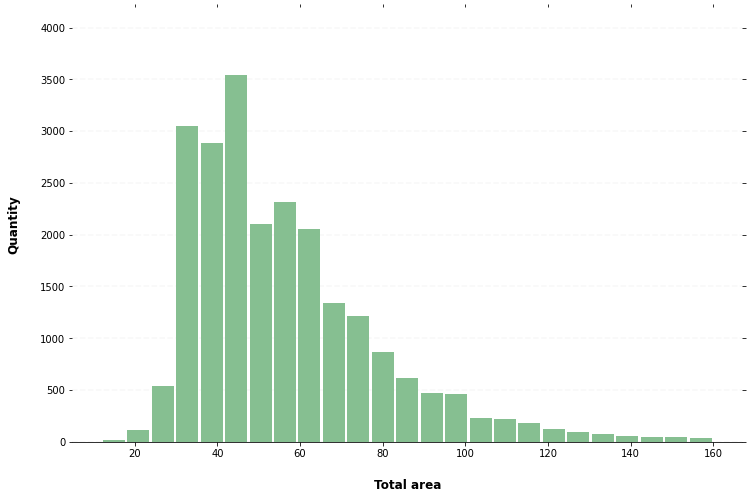

In [339]:
#display(data.sample(15))
# Гистограмма для 'total_area':
##data.hist(column='total_area', bins=100, range=(0, 300))
##data['total_area'].describe()

#data['total_area'].value_counts()
#high_200 = data[data['total_area'] > 200]
#data = data[data['total_area'] != high_200]
#display(len(data[data['total_area'] > 200]))

ax = data.hist(column='total_area', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Total area", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=12)


### Больше всего квартир площадью 45 кв м.

4500000.0     342
3500000.0     289
4000000.0     260
4300000.0     260
4200000.0     258
             ... 
9917600.0       1
3180500.0       1
7297000.0       1
31490000.0      1
4386000.0       1
Name: last_price, Length: 2964, dtype: int64

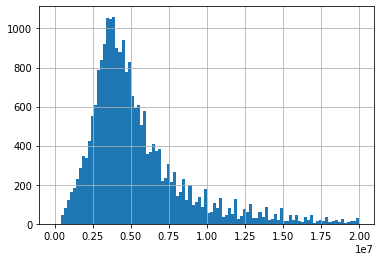

In [297]:
# Гистограмма для 'last_price':
data['last_price'].hist(bins=100, range=(100, 20000000))
data['last_price'].describe()
data['last_price'].value_counts()

### Больше всего квартир стоимостью 4 500 000 руб.

<AxesSubplot:>

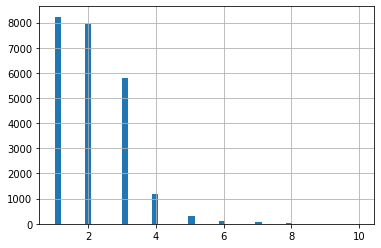

In [298]:
# Гистограмма для 'rooms':
data['rooms'].hist(bins=50, range=(1, 10))
#display(data['rooms'].describe())
#data['rooms'].value_counts()

### Из данных видно, что чем больше комнат, тем меньше количество таких квартир.

2.65     9836
2.50     3515
2.60     1645
2.70     1572
3.00     1109
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

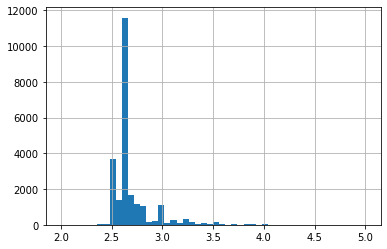

In [299]:
# Гистограмма для 'ceiling_height':
data['ceiling_height'].hist(bins=50, range=(2, 5))
data['ceiling_height'].describe()
data['ceiling_height'].value_counts()

### У большинства квартир высота потолков 2.55 м.

### 4.2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

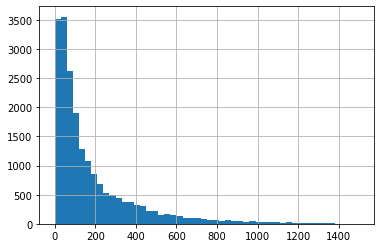

In [300]:
# 4.2.1.Построим гистрограмму по столбцу 'days_exposition':
data['days_exposition'].hist(bins=50, range=(0, 1500))
data['days_exposition'].describe()

In [301]:
# 4.2.2.Узнаем медианное и среднее значение продаж:
medi_days = data['days_exposition'].median()
mean_days = data['days_exposition'].mean()
display(f'Мидианное значение времени продажи {medi_days:.0f} дней')
display(f'Среднее значение времени продажи {mean_days:.0f} день')

'Мидианное значение времени продажи 95 дней'

'Среднее значение времени продажи 181 день'

#### 4.2.3. Обычно продажа занимает до 3-х месяцев.

#### 4.2.4. Если продажа уложилась в 3 месяца - она быстрая. Свыше трёх месяцев - долгая продажа.

### 4.3. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены.

In [302]:
# площадь
display(data.sample(15))
data['total_area'].value_counts()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor,liv_to_tot_area,kit_to_tot_area
23032,12,8999999.0,100.00,2017-10-23,3,2.60,18.0,66.00,5,False,...,0.0,NaN,59.0,89999,0,2017-10-01,2017,другой,0.660000,0.250000
20692,1,6755060.0,56.13,2017-06-02,2,2.65,25.0,29.00,2,False,...,0.0,NaN,394.0,120346,4,2017-06-01,2017,другой,0.516658,0.205772
21223,9,6500000.0,64.00,2016-01-23,3,2.50,12.0,42.00,2,False,...,0.0,NaN,NaN,101562,5,2016-01-01,2016,другой,0.656250,0.109375
6381,1,4780000.0,84.00,2016-04-25,3,2.65,21.0,53.00,18,False,...,0.0,NaN,133.0,56904,0,2016-04-01,2016,другой,0.630952,0.154762
10725,12,3000000.0,25.60,2017-05-24,1,2.70,18.0,14.17,13,False,...,0.0,NaN,558.0,117187,2,2017-05-01,2017,другой,0.553516,0.553516
19752,9,2100000.0,41.60,2017-11-21,2,2.65,5.0,27.50,1,False,...,0.0,NaN,45.0,50480,1,2017-11-01,2017,первый,0.661058,0.144231
15020,5,2980000.0,33.00,2018-10-05,1,2.60,9.0,17.50,7,False,...,0.0,NaN,30.0,90303,4,2018-10-01,2018,другой,0.530303,0.190909
9902,11,4690000.0,60.00,2017-10-21,3,2.55,10.0,37.40,6,False,...,0.0,NaN,155.0,78166,5,2017-10-01,2017,другой,0.623333,0.120000
5073,12,5990000.0,54.00,2019-02-26,2,3.00,4.0,21.50,3,False,...,0.0,NaN,NaN,110925,1,2019-02-01,2019,другой,0.398148,0.370370
2070,19,5000000.0,57.70,2018-03-22,3,2.50,9.0,39.60,1,False,...,1.0,422.0,405.0,86655,3,2018-03-01,2018,первый,0.686308,0.105719


45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
56.85       1
37.92       1
115.60      1
117.40      1
55.06       1
Name: total_area, Length: 2181, dtype: int64

In [390]:
# Узнаем сколько квартир площадью больше 160 кв м.:
display(len(data[data['total_area'] > 160]))

0

In [391]:
# Какое отношение от общего кол-ва данных они составляют:
excess_data_a = len(data[data['total_area'] > 160]) / len(data) * 100
display(f'Хвост квартир площадью больше 160 кв. м. составляет - {excess_data_a:.2f}%')

'Хвост квартир площадью больше 160 кв. м. составляет - 0.00%'

<AxesSubplot:>

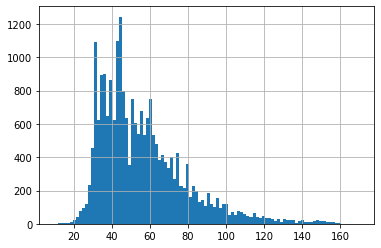

In [392]:
# Перезапишемся переменную, убрав квартиры площадью больше 160 кв. м.
#display(data['first_day_exposition'].max() - data['first_day_exposition'].min())
data = data[data['total_area'] < 160]
data['total_area'].hist(bins=100, range=(10, 170))

' 0.0'

<AxesSubplot:>

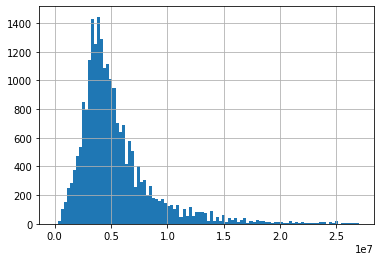

In [393]:
# цена
price_a = len(data[data['last_price'] > 27000000]) / len(data) * 100
display(f' {price_a}')

#price_b = len(data[data['last_price'] > 15000000]) / len(data) * 100
#display(f' {price_b}')

data = data[data['last_price'] < 27000000]
data['last_price'].hist(bins=100, range=(10, 27000000))


<AxesSubplot:>

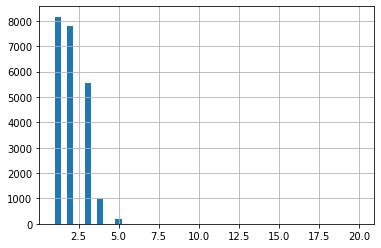

In [394]:
# число комнат
#name_stat = data.pivot_table(index='rooms', values='last_price', aggfunc='count')
#display(name_stat)

rooms_a = len(data[data['rooms'] > 6]) / len(data) * 100

# уберем лишнее
data = data[data['rooms'] < 6]
#display(f' {rooms_a}')

data['rooms'].hist(bins=50, range=(1, 20))
#len(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor,liv_to_tot_area,kit_to_tot_area,cityCenters_km
5469,14,7480000.0,70.0,2017-11-27,2,2.80,5.0,38.0,3,False,...,177.0,85.0,106857,0,2017-11-01,2017,другой,0.542857,0.171429,30
507,12,4200000.0,53.0,2017-09-11,2,2.65,9.0,27.7,4,False,...,NaN,89.0,79245,0,2017-09-01,2017,другой,0.522642,0.196226,29
19812,18,4090000.0,44.1,2018-03-26,1,3.00,7.0,25.0,3,False,...,466.0,43.0,92743,0,2018-03-01,2018,другой,0.566893,0.229025,14
18419,11,2200000.0,43.0,2017-04-14,2,2.65,3.0,22.0,2,False,...,NaN,8.0,51162,4,2017-04-01,2017,другой,0.511628,0.232558,0
14069,13,5150000.0,43.0,2017-10-30,1,3.42,6.0,21.5,3,False,...,848.0,6.0,119767,0,2017-10-01,2017,другой,0.500000,0.325581,3
17785,9,3200000.0,44.6,2018-10-24,2,2.52,5.0,30.6,1,False,...,NaN,156.0,71748,2,2018-10-01,2018,первый,0.686099,0.132287,28
15641,13,3786000.0,35.0,2017-06-29,1,2.50,4.0,16.0,1,False,...,468.0,642.0,108171,3,2017-06-01,2017,первый,0.457143,0.228571,32
3397,1,2700000.0,27.0,2018-07-15,1,2.55,5.0,16.0,3,False,...,606.0,136.0,100000,6,2018-07-01,2018,другой,0.592593,0.203704,52
293,2,900000.0,42.8,2017-06-14,2,2.65,5.0,32.0,5,False,...,NaN,247.0,21028,2,2017-06-01,2017,последний,0.747664,0.116822,0
21489,1,10379600.0,67.4,2018-03-15,2,2.65,14.0,36.0,12,False,...,592.0,34.0,154000,3,2018-03-01,2018,другой,0.534125,0.183234,6


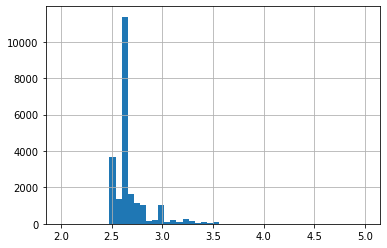

In [395]:
# высота потолков
# уберём строки с аномально-низкими-высокими потолками:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <=3.5)]

data['ceiling_height'].hist(bins=50, range=(2, 5))
data['ceiling_height'].value_counts()

data.sample(15)

### 4.4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [310]:
# 1. построить корреляцию для нужных параметров
corp = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
print(corp)

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.768412  0.465283            -0.342768
total_area             0.768412    1.000000  0.789870            -0.202845
rooms                  0.465283    0.789870  1.000000            -0.130915
cityCenters_nearest   -0.342768   -0.202845 -0.130915             1.000000


#### 2. Есть три главных параметра, которые влияют на цену квартиры: площадь, кол-во комнат и удалённость от центра.

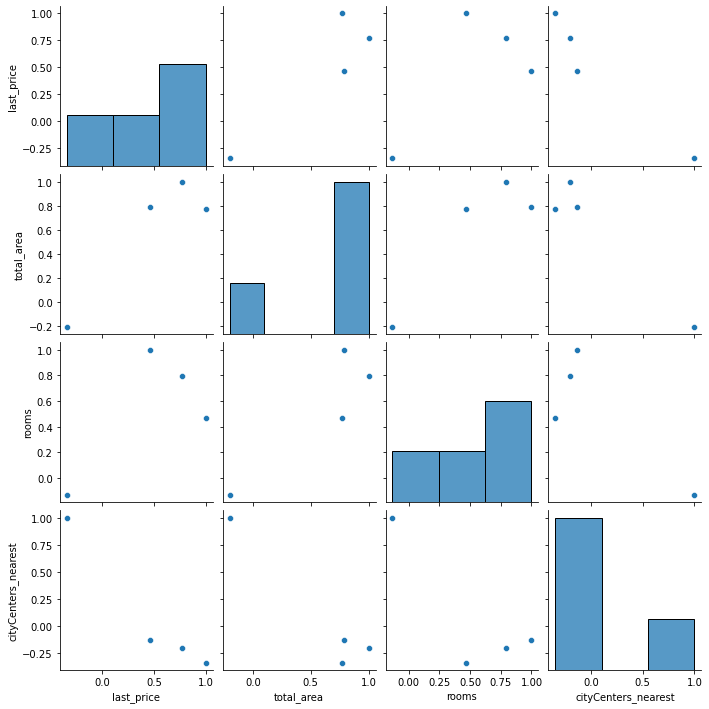

In [311]:
# 3. Визуализация параметров
sns.pairplot(corp)

<AxesSubplot:xlabel='flat_floor'>

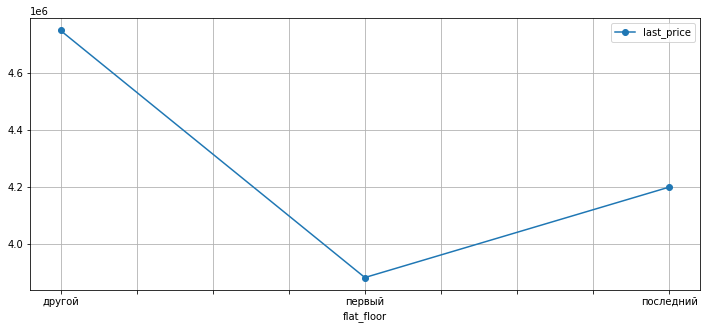

In [396]:
# 4. Построение обычных графиков для остальных параметров

# Зависимость цены от этажа
(data
 .pivot_table(index='flat_floor', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(12, 5))
)

* Первые и последние этажи по практическим моментам давно не в почёте.
* Другие этажи более популярны и цена на них выше.

<AxesSubplot:xlabel='weekday'>

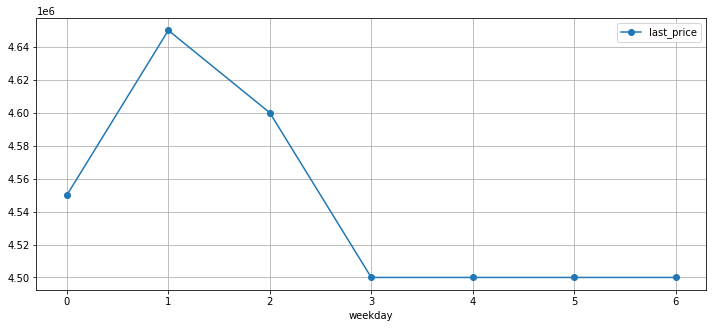

In [397]:
# Зависимость цены от дня размещения объявления
(data
 .pivot_table(index='weekday', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(12, 5))
)

* После выходных (до вторника) есть всплеск, затем спад и с четверга идёт стабильность.

<AxesSubplot:xlabel='month'>

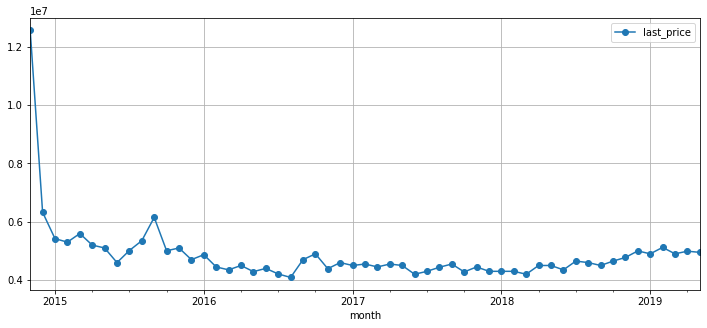

In [398]:
# Зависимость цены от месяца размещения объявления
(data
 .pivot_table(index='month', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(12, 5))
)

* в 2014 году был подъём, к 2015-16 году вышло на плато и дальше идёт планомерный рост.

<AxesSubplot:xlabel='year'>

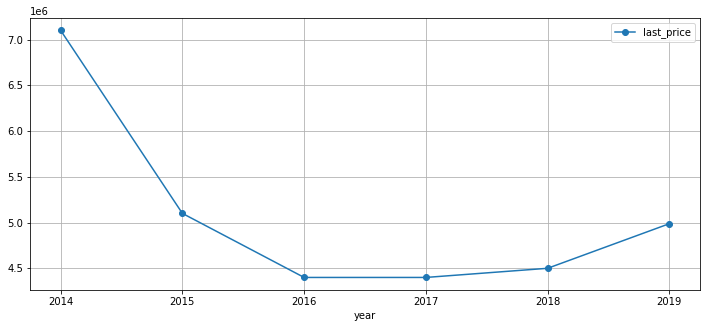

In [399]:
# Зависимость цены от года размещения объявления
(data
 .pivot_table(index='year', values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(12, 5))
)

* в 2014 году был подъём, к 2015-16 году вышло на плато и дальше идёт планомерный рост.

### На цену больше всего влияют площадь и количество комнат.

### 4.5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [313]:
# Находим топ 10 локаций по объявлениям:
data = data.loc[data['last_price'] != 12190]
data_pivot_loc1 = data.pivot_table(index='locality_name', values = 'last_price', aggfunc='count')
loc_to_10 = ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]

In [314]:
# Средняя цена кв м в топ-10 локаций:
data_pivot_loc1_1 = data.query('locality_name == @loc_to_10').pivot_table(index='locality_name', values = 'for_1_sq_m', aggfunc='mean')
display(data_pivot_loc1_1.sort_values('for_1_sq_m', ascending=False).astype('int'))

,for_1_sq_m
locality_name,
Санкт-Петербург,109946
Пушкин,102195
деревня Кудрово,92473
посёлок Парголово,90361
посёлок Мурино,85724
посёлок Шушары,78654
Колпино,75352
Гатчина,68810
Всеволожск,68616


### Такова средняя цена за 1 кв м в топ 10.

In [315]:
# мин / макс стоимость жилья в топе:
data_pivot_loc2 = data.query('locality_name == @loc_to_10').pivot_table(index='locality_name', values = 'last_price', aggfunc=['max', 'min'])
display(data_pivot_loc2.sort_values(('max', 'last_price'), ascending=False))

,max,min
,last_price,last_price
locality_name,,
Санкт-Петербург,26990000.0,1190000.0
Пушкин,26500000.0,1990000.0
Всеволожск,24412900.0,965780.0
Гатчина,13900000.0,850000.0
деревня Кудрово,13000000.0,1800000.0
Колпино,12750000.0,2100000.0
посёлок Шушары,10990000.0,1500000.0
Выборг,9200000.0,600000.0


* Самая высокая цена в Санкт-Петербурге - 26 990 000 р.
* Самая минимальная цена в Выборге - 600 000 р.

### 4.6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [316]:
# Заменим пропуски 0 значением
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
# изменим тип данных
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
# создадим новый столбец
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).astype('int')

In [317]:
# Заменим 61 пропуск 0 значением.
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
# Изменим тип данных.
#data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int') 

# избавимся от нулей и выберем только Санк-Петербург
data_spb = data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest != 0')

#### Были выделены квартиры в Санкт-Петербурге.

#### Создан новый столбец "cityCenters_km", значения округлены до целых.

In [407]:
#data_spb_pivot = data_spb.pivot_table(index='locality_name', columns='cityCenters_km', values = 'last_price', aggfunc='mean')
data_spb_pivot = data_spb.pivot_table(index='cityCenters_km', values = 'last_price', aggfunc='mean')

data_spb_pivot.sort_values('cityCenters_km', ascending=True).astype('int')

,last_price
cityCenters_km,
0,10501980
1,9982091
2,9582808
3,9235240
4,10216543
5,9222987
6,8992835
7,8256413
8,7864552


#### Посчитана средняя цена для каждого километра.

<AxesSubplot:xlabel='cityCenters_km'>

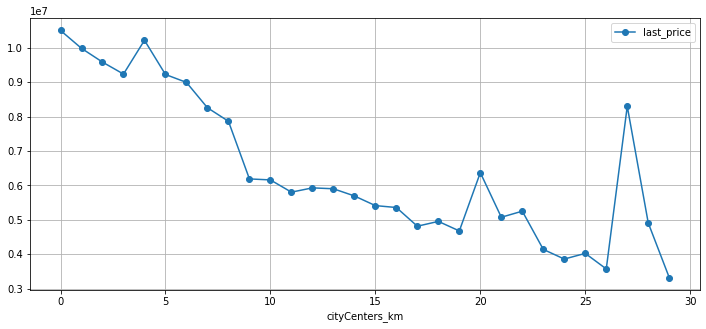

In [319]:
(data_spb
    .pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(12, 5))
)

#### Построен график зависимости цены от удалённости от центра.

#### График сильно меняется после 5 км, т.е. центр можно считать до этой границы (5 км).

### 4.7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [409]:
# выделим центр СПБ.
data_spb_center = data_spb.query('cityCenters_km <= 5')

display(data_spb_center.sort_values(by='cityCenters_km', ascending=True).head(10))


# Зависимость цены от площади
#l_t = data['last_price'].corr(data['total_area'])
#display(f'Зависимость цены от площади: {l_t:.2f}')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,for_1_sq_m,weekday,month,year,flat_floor,liv_to_tot_area,kit_to_tot_area,cityCenters_km
5747,3,9500000.0,81.00,2016-05-17,2,2.65,4.0,41.00,2,False,...,234.0,159.0,117283,1,2016-05-01,2016,другой,0.506173,0.197531,0
15321,17,7499000.0,64.50,2018-08-18,2,2.65,3.0,41.20,1,False,...,290.0,80.0,116263,5,2018-08-01,2018,первый,0.638760,0.117829,0
6297,13,15900000.0,101.00,2016-05-06,3,3.50,4.0,36.00,2,False,...,266.0,452.0,157425,4,2016-05-01,2016,другой,0.356436,0.396040,0
15284,1,12500000.0,103.00,2018-02-28,4,3.30,4.0,72.30,4,False,...,38.0,NaN,121359,2,2018-02-01,2018,последний,0.701942,0.123301,0
2609,20,7200000.0,80.00,2017-08-24,3,2.80,4.0,43.00,1,False,...,516.0,11.0,90000,3,2017-08-01,2017,первый,0.537500,0.100000,0
2326,1,8500000.0,125.00,2017-09-28,4,3.50,6.0,95.00,3,False,...,251.0,12.0,68000,3,2017-09-01,2017,другой,0.760000,0.064000,0
1351,14,8500000.0,66.20,2019-02-27,3,3.01,4.0,37.40,4,False,...,243.0,NaN,128398,2,2019-02-01,2019,последний,0.564955,0.141994,0
14837,13,6200000.0,61.00,2017-12-06,2,2.80,3.0,36.00,2,False,...,194.0,83.0,101639,2,2017-12-01,2017,другой,0.590164,0.149180,0
5195,13,9500000.0,60.28,2018-09-19,2,3.47,4.0,39.18,3,False,...,184.0,216.0,157597,2,2018-09-01,2018,другой,0.649967,0.132714,0
19694,20,24000000.0,132.50,2016-10-12,4,3.20,4.0,NaN,3,False,...,38.0,785.0,181132,2,2016-10-01,2016,другой,NaN,0.068679,0


5968672.169958586

<AxesSubplot:xlabel='total_area'>

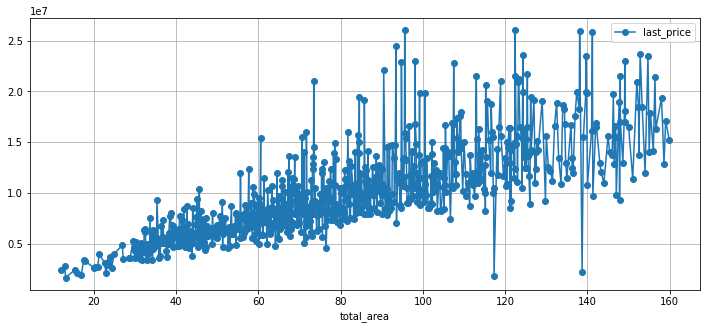

In [387]:
# анализ площади к цене.
(data_spb_center
    .pivot_table(index='total_area', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(12, 5))
)

#### Из графика видно: чем больше площадь, тем больше цена.
* Видны две аномально низкие цены с площадью под 120 м2 и 140 м2.

<AxesSubplot:xlabel='rooms'>

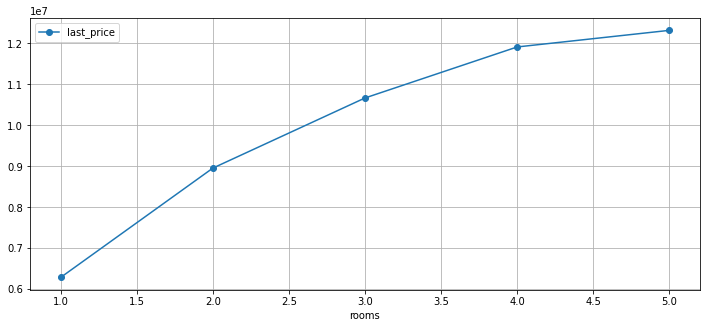

In [322]:
# анализ количества комнат к цене.
(data_spb_center
    .pivot_table(index='rooms', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(12, 5))
)

#### Из графика видно: чем больше комнат, тем больше цена.

<AxesSubplot:xlabel='ceiling_height'>

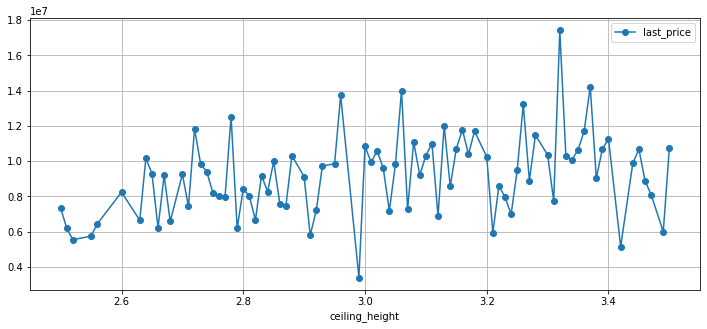

In [323]:
# анализ зависимости высоты потолков к цене.
(data_spb_center
    .pivot_table(index='ceiling_height', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(12, 5))
)

#### Из графика прослеживается зависимость высоты потолков к цене.

<AxesSubplot:xlabel='floor'>

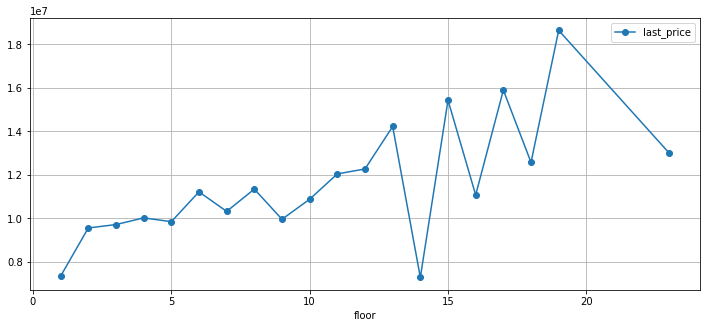

In [324]:
# анализ зависимости этажа к цене.
(data_spb_center
    .pivot_table(index='floor', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(12, 5))
)

#### Чем выше этаж, тем больше стоимость, но последний этаж падает в цене.

<AxesSubplot:xlabel='first_day_exposition'>

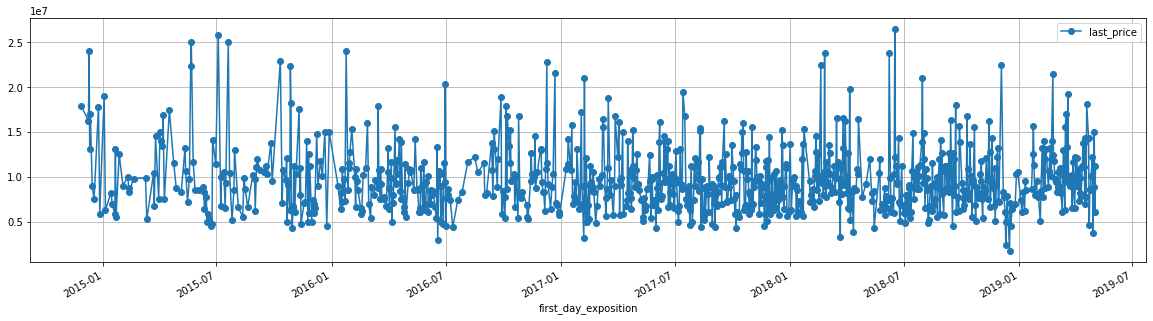

In [325]:
# анализ даты размещения к цене.
(data_spb_center
    .pivot_table(index='first_day_exposition', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(20, 5))
)

#### с 2017.01 плотность объявлений больше и цена повыше.

<AxesSubplot:xlabel='cityCenters_km'>

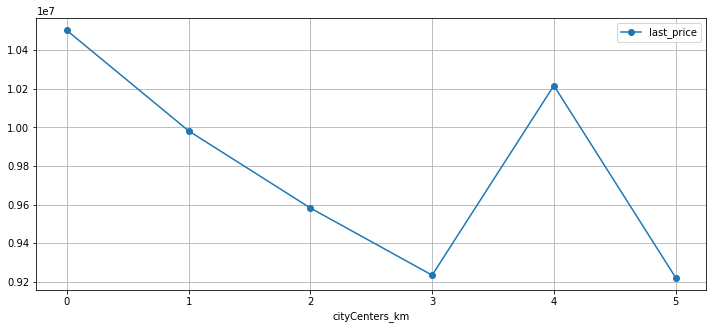

In [326]:
# анализ удаленности от центра к цене.
(data_spb_center
    .pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(12, 5))
)

#### Чем ближе к центру, тем дороже.

## Общий вывод

### При обработке данных были выявлены:
* пропуски в столбцах
* неверные типы данных
* аномалии в данных

### Рекомендации к заказчику:
* более тщательно проверять информацию собираемую автоматическим способом и не только.

### Выполнена работа:
* убраны аномалии в данных
* выявлены факторы влияющие на цену

### Рыночная стоимость:
* средняя цена в центре (5 км) СПБ - 9 679 250.00р. 
* средняя цена за пределами центра СПБ - 5 968 672.00р.

### Наилучший (дорогой) вариант выглядит так:
* Расположение в центре СПБ
* Этаж не первый и не последний
* Максимальная площадь
* Большое количество комнат